In [108]:
import numpy as np
import pandas as pd
data=np.genfromtxt("0000000000002417_training_boston_x_y_train.csv",delimiter=",")
data.shape

(379, 14)

In [109]:
X=data[:,0:13]
Y=data[:,13]
X.shape

(379, 13)

In [110]:
#Adding first column squared data for more complex decision boundaries
a1=np.zeros((379,1))
for i in range(data.shape[0]):
    a1[i,0] = (X[i,0]**2)
    
X=np.append(X,a1,axis=1)
X.shape

(379, 14)

In [111]:
#Taking the intercept values as 1
a=np.ones((379,1))
X=np.append(X,a,axis=1)
X.shape

(379, 15)

In [112]:
data2=np.genfromtxt("0000000000002417_test_boston_x_test.csv",delimiter=",")
data2.shape

(127, 13)

In [113]:
t=data2[:,0]
t=t.reshape(-1,1)
t=t**2

data2=np.append(data2,t,axis=1)
data2.shape

(127, 14)

In [114]:
a=np.ones((127,1))
data2=np.append(data2,a,axis=1)
data2.shape

(127, 15)

In [116]:
X,data2

(array([[-0.40784991, -0.48772236, -1.2660231 , ..., -1.09799011,
          0.16634155,  1.        ],
        [-0.40737368, -0.48772236,  0.24705682, ..., -0.52047412,
          0.16595332,  1.        ],
        [ 0.1251786 , -0.48772236,  1.01599907, ...,  0.89107588,
          0.01566968,  1.        ],
        ...,
        [-0.40831101, -0.48772236,  0.24705682, ..., -0.33404299,
          0.16671788,  1.        ],
        [-0.41061997, -0.48772236, -1.15221381, ..., -0.74475218,
          0.16860876,  1.        ],
        [ 0.34290895, -0.48772236,  1.01599907, ..., -1.35871335,
          0.11758655,  1.        ]]),
 array([[ 2.91816626, -0.48772236,  1.01599907, ...,  1.04106182,
          8.51569432,  1.        ],
        [-0.40339151, -0.48772236,  0.40609801, ..., -0.89473812,
          0.16272471,  1.        ],
        [-0.4131781 , -0.48772236,  0.11573841, ..., -0.50084979,
          0.17071614,  1.        ],
        ...,
        [-0.41001449,  2.08745172, -1.37837329, ..., -

In [123]:
#SCALING THE DATA:
def scaling(data):
    return data - data.mean()/(data.max()-data.min())

X = scaling(X)
Y = scaling(Y)
data2 = scaling(data2)
X,data2

(array([[-0.37199369, -0.45186614, -1.23016688, ..., -1.06213389,
          0.20219777,  1.03585622],
        [-0.37151746, -0.45186614,  0.28291304, ..., -0.4846179 ,
          0.20180954,  1.03585622],
        [ 0.16103482, -0.45186614,  1.05185529, ...,  0.9269321 ,
          0.0515259 ,  1.03585622],
        ...,
        [-0.37245479, -0.45186614,  0.28291304, ..., -0.29818677,
          0.2025741 ,  1.03585622],
        [-0.37476375, -0.45186614, -1.11635759, ..., -0.70889596,
          0.20446498,  1.03585622],
        [ 0.37876517, -0.45186614,  1.05185529, ..., -1.32285713,
          0.15344277,  1.03585622]]),
 array([[ 3.10453081, -0.30135781,  1.20236362, ...,  1.22742637,
          8.70205887,  1.18636455],
        [-0.21702696, -0.30135781,  0.59246256, ..., -0.70837357,
          0.34908926,  1.18636455],
        [-0.22681355, -0.30135781,  0.30210296, ..., -0.31448524,
          0.35708069,  1.18636455],
        ...,
        [-0.22364994,  2.27381627, -1.19200874, ..., -

In [125]:
def calc_pred(X,m):
    y_train_pred = np.dot(X,m.reshape(-1,1)) 
    return y_train_pred

In [126]:
def calc_pred2(data2,m):
    y_test_pred = np.dot(data2,m.reshape(-1,1)) 
    np.savetxt("boston_pred.csv",y_test_pred,delimiter=",")
    return y_test_pred

In [127]:
def cost(X,Y,m):
    rows=X.shape[0]
    col=X.shape[1]
    cost=0
    for i in range(rows):
        x=X[i,:]
        y=Y[i]
        ans=0
        for j in range(col):
            ans+=(m[j]*x[j])
        
        cost+=(1/rows)*((y-ans)**2)
    
    return cost

In [128]:
def gd(X,Y,learning_rate,num_iterations,cost_list):
    m=np.zeros(X.shape[1])
    
    for i in range(num_iterations):
        m=step_gradient(X,Y,learning_rate,m)
        cost_list.append(cost(X,Y,m))
        #print("cost=",cost(X,Y,m))
        
    return m

In [129]:
def step_gradient(X,Y,learning_rate,m):
    m_slope=np.zeros(X.shape[1])
    rows=X.shape[0]
    col=X.shape[1]
    
    for i in range(rows):
        x=X[i,:]
        y=Y[i]
        ans=0
        for j in range(col):
            ans+=m[j]*x[j]
        
        for k in range(col):
            m_slope[k] = (-2/rows)*(y-ans)*x[k]
        
        
        m=m-(learning_rate)*m_slope
    
    return m
        

In [145]:
def run(X,Y):
    cost_list = []
    learning_rate=0.002
    num_iterations=600
    m = gd(X,Y,learning_rate,num_iterations,cost_list)
    plot_cost(cost_list,num_iterations)
    return m,cost_list

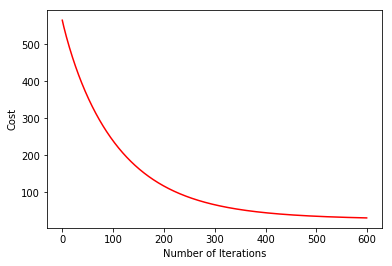

In [146]:
m,cost_list = run(X,Y)

In [147]:
#Calculate Predictions
y_train_pred=calc_pred(X,m)
y_test_pred=calc_pred2(data2,m)

In [57]:
import matplotlib.pyplot as plt
def plot_cost(cost_list,num_iterations):
    x_axis = np.array(range(num_iterations))
    y_axis = np.array(cost_list)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.plot(x_axis,y_axis,c='r')

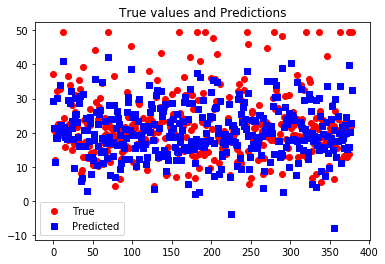

In [148]:
def plot_pred(y_train_pred):
    x_axis = np.array(range(Y.shape[0]))
    plt.scatter(x_axis,Y,c='r',marker = 'o',label='True')
    plt.scatter(x_axis,y_train_pred,c='b',marker = 's',label='Predicted')
    plt.title('True values and Predictions')
    plt.legend()
    
plot_pred(y_train_pred)